## Whats K means Clustering ?:

Its an unsupervised algorithm which divides the data set in K sets finding mean of each that is there centeroid and then try to minimize the variance of each cluster .

# So how does it work ?

1)Selecting Random K clusters

---


2)Finding centroid to each cluster and assign it a data point

---


3)Finding the euclidiaan distance and recalculate the centroids as the mean of all data points assigned to each cluster.

---
4)Repeating the steps 2 and 3 till we converge it to its best


#Whats Gradient Descent

its an optimisation algorithm , it works by iterating in the direction of steepest slopes and update its value till it minimize loss function for the model

#How will we use Gradient Descent in K means Algorithm

By iteratively updating the centroids, it converges to a set of centroids that minimize the objective function.

As we proceed , i would like to prove it with code

import libraries and a dummy data set with make_blobs and with number of centers being 4 with std deviation being of 0.60 and then scaling it

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=23)

scal = StandardScaler()
X = scal.fit_transform(X)

K = 4
l = 0.01
iter = 100

Making K random centroids

In [14]:
centroids = X[np.random.choice(X.shape[0], K, replace=False)]

So in each cluster we assign a data point and find its euclidian distance with sqrt((x1-x2)^2+(y1-y2)^2)


In [15]:
def data_points(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

Updating each centroid to reduce the distance , this is done by gradient descent update rule . Which finds the gradient of the function and deduct it with the original value to get new value for the centroid which is nearer and reduces the loss

In [16]:
def update_centroids(X, clusters, centroids, l):
    new_centroids = np.zeros_like(centroids)
    for k in range(K):
        points = X[clusters == k]
        if points.shape[0] > 0:
            gradient = -2 * np.sum(points - centroids[k], axis=0)
            new_centroids[k] = centroids[k] - l * gradient
    return new_centroids

Now after finding the final values of the centroid we update it to to the cluster and replace the old centroid with the new one , and repeat the whole process till we minimize the loss

In [17]:
for i in range(iter):
    clusters = data_points(X, centroids)
    new_centroids = update_centroids(X, clusters, centroids, l)
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

Visualizing the Cluster

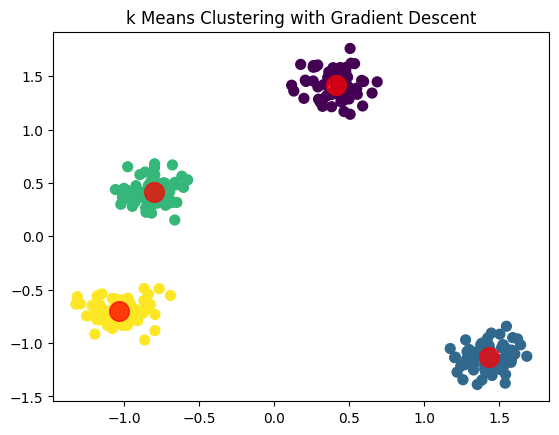

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('k Means Clustering with Gradient Descent')
plt.show()

Same K mean clustering done with the sklearn library

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)
clusters = kmeans.predict(X)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the K mean Clustering with Sklearn

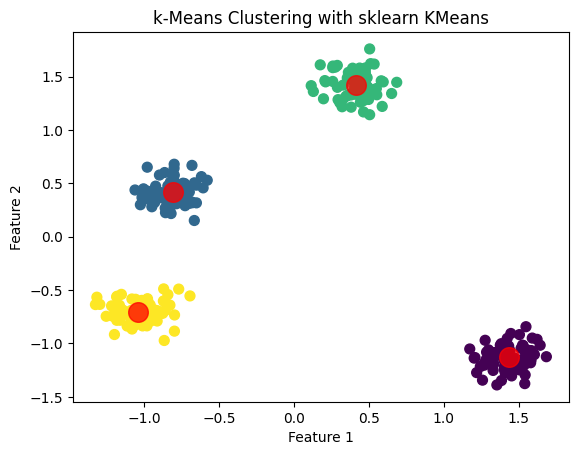

In [21]:

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('k-Means Clustering with sklearn KMeans')
plt.show()

Hence Proved:                                                                   
as we can see by visualizing that we get the same centroid for each cluster both by graident descnet and Sklearn Kmeans , we can conclude the code for the graident descent method was correct .





Conclusion:
we made a update graident descent model which was used for k means clustering , it can used on a large complex data set where we might want to make changes for faster implementation or just to know how the Sklearn Kmeans work behind the function .